# Solving Linear Systems with Squared, Undetermined (fat), Overdetermined (skinny) matrices

In [1]:
from scipy import linalg as la
from scipy import optimize as op
import sympy
sympy.init_printing()
import numpy as np

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.size"] = "12"

In [7]:
from __future__ import division

In [8]:
A = np.array([[2, 3], [5, 4]])
b = np.array([4, 3])
x = la.solve(A, b)
print (x)

[-1.  2.]


"fig.tight_layout()\nfig.savefig('pdf_files/ch5-linear-systems-simple.pdf')"

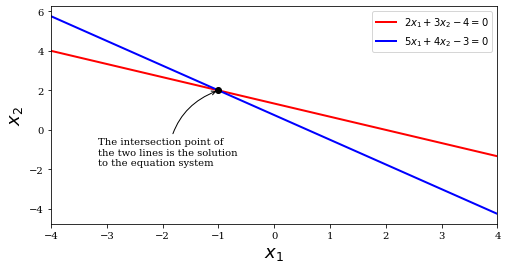

In [9]:
fig, ax = plt.subplots(figsize=(8, 4))

x1 = np.linspace(-4, 4, 100)
x2_1 = (4 - 2 * x1)/3
x2_2 = (3 - 5 * x1)/4

ax.plot(x1, x2_1, 'r', lw=2, label=r"$2x_1+3x_2-4=0$")
ax.plot(x1, x2_2, 'b', lw=2, label=r"$5x_1+4x_2-3=0$")
ax.set_xlim(-4,4)
ax.plot(x[0], x[1], 'ko', lw=2)
ax.annotate("The intersection point of\nthe two lines is the solution\nto the equation system",
            xy=(x[0], x[1]), xycoords='data',
            xytext=(-120, -75), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.3"))

ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
ax.legend();

'''fig.tight_layout()
fig.savefig('pdf_files/ch5-linear-systems-simple.pdf')'''

### Symbolic approach

In [10]:
A = sympy.Matrix([[2, 3], [5, 4]])
b = sympy.Matrix([4, 3])
A

⎡2  3⎤
⎢    ⎥
⎣5  4⎦

In [11]:
b

⎡4⎤
⎢ ⎥
⎣3⎦

In [12]:
A.rank()

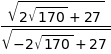

In [13]:
A.condition_number()

In [14]:
sympy.N(_)

In [15]:
A.norm()

In [16]:
A.LUdecomposition()

⎛⎡ 1   0⎤  ⎡2   3  ⎤    ⎞
⎜⎢      ⎥, ⎢       ⎥, []⎟
⎝⎣5/2  1⎦  ⎣0  -7/2⎦    ⎠

In [17]:
L, U, _ = A.LUdecomposition()

In [18]:
L

⎡ 1   0⎤
⎢      ⎥
⎣5/2  1⎦

In [19]:
U

⎡2   3  ⎤
⎢       ⎥
⎣0  -7/2⎦

In [20]:
L * U

⎡2  3⎤
⎢    ⎥
⎣5  4⎦

In [21]:
x = A.solve(b)

In [22]:
x

⎡-1⎤
⎢  ⎥
⎣2 ⎦

In [23]:
# or 1st alternatively 
# with LUsolve()
x = A.LUsolve(b)
x

⎡-1⎤
⎢  ⎥
⎣2 ⎦

In [24]:
# but 2nd alternative 
# cannot be used as A is a symbolic matrix
#x = la.solve(A,b)  #with la from linalg or better linalg.solve(A,b)

### Numerical approach

In [25]:
A = np.array([[2, 3], [5, 4]])
b = np.array([4, 3])

In [26]:
np.linalg.matrix_rank(A)

2

In [29]:
print (np.linalg.cond(A))

7.582401374401514


In [30]:
print (round(80.23456, 2))
print (np.around([0.37, 1.64], decimals=10))

Ainv = np.linalg.inv(A)
print (Ainv)
print (np.around(np.dot(Ainv, A),decimals=10))
print (np.around(np.dot(A, Ainv),decimals=10))

80.23
[0.37 1.64]
[[-0.57142857  0.42857143]
 [ 0.71428571 -0.28571429]]
[[ 1.  0.]
 [-0.  1.]]
[[1. 0.]
 [0. 1.]]


In [31]:
print (np.linalg.norm(np.linalg.inv(A)) * np.linalg.norm(A))

print (np.around(np.linalg.norm(np.linalg.inv(A)) * np.linalg.norm(A),decimals=10))

7.714285714285714
7.7142857143


In [32]:
from numpy.linalg import inv

print (A.T)
print (inv(A))
print ("the norm of the Inverse of A is ")
print (np.linalg.cond(A) / np.linalg.norm(A))

print (" or the norm of the Inverse of A is ")
print (np.linalg.norm(inv(A)))

print (" and the condition number of A is ")
print (np.linalg.norm(inv(A))*np.linalg.norm(A))
print (" But it is different from the Python library ")
print (np.linalg.cond(A))

[[2 5]
 [3 4]]
[[-0.57142857  0.42857143]
 [ 0.71428571 -0.28571429]]
the norm of the Inverse of A is 
1.031834132903421
 or the norm of the Inverse of A is 
1.0497813183356477
 and the condition number of A is 
7.714285714285714
 But it is different from the Python library 
7.582401374401514


In [33]:
P, L, U = la.lu(A)

In [34]:
L

array([[1. , 0. ],
       [0.4, 1. ]])

In [35]:
U

array([[5. , 4. ],
       [0. , 1.4]])

In [36]:
L*U

array([[5. , 0. ],
       [0. , 1.4]])

In [37]:
# Now we use la.solve(), and now this works, as A is NOT a symbolic matrix
la.solve(A, b)

array([-1.,  2.])

In [38]:
# but LUsolve() cannot be used as A is NOT a symbolic matrix
# x = A.LUsolve(b)

### Example : rank and condition numbers -> numerical errors

In [39]:
p = sympy.symbols("p", positive=True)
print (p)

p


In [40]:
A = sympy.Matrix([[1, sympy.sqrt(p)], [1, 1/sympy.sqrt(p)]])

In [41]:
b = sympy.Matrix([1, 2])

In [42]:
sympy.simplify(A.solve(b))

⎡2⋅p - 1⎤
⎢───────⎥
⎢ p - 1 ⎥
⎢       ⎥
⎢  -√p  ⎥
⎢ ───── ⎥
⎣ p - 1 ⎦

In [43]:
# Symbolic problem specification
p = sympy.symbols("p", positive=True)
A = sympy.Matrix([[1, sympy.sqrt(p)], [1, 1/sympy.sqrt(p)]])
b = sympy.Matrix([1, 2])

# Solve symbolically
x_sym_sol = A.solve(b)
x_sym_sol.simplify()
x_sym_sol
Acond = A.condition_number().simplify()
print (Acond)

Max(sqrt(2)*sqrt((p + 1)**2 - sqrt(p**4 + 14*p**2 + 1))/(2*sqrt(p)), sqrt(2)*sqrt((p + 1)**2 + sqrt(p**4 + 14*p**2 + 1))/(2*sqrt(p)))/Min(sqrt(2)*sqrt((p + 1)**2 - sqrt(p**4 + 14*p**2 + 1))/(2*sqrt(p)), sqrt(2)*sqrt((p + 1)**2 + sqrt(p**4 + 14*p**2 + 1))/(2*sqrt(p)))


In [44]:
#Function for solving numerically
AA        = lambda p: np.array([[1, np.sqrt(p)], [1, 1/np.sqrt(p)]])
bb        = np.array([1, 2])
x_num_sol = lambda p: np.linalg.solve(AA(p), bb)
x_num_A   = lambda p: AA(p)

In [45]:
p_vec = np.linspace(0.9, 1.1, 2)
print (p_vec)
i = 0
for n in range(2):
    x_sym = np.array([x_sym_sol[n].subs(p, pp).evalf() for pp in p_vec])
    x_num = np.array([x_num_sol(pp)[n] for pp in p_vec])
    x_A   = x_num_A(p_vec[i])
    i     = i + 1
    print (" the matrix A ")
    print (x_A)
    print (" the solution ")
    print (x_num )

[0.9 1.1]
 the matrix A 
[[1.         0.9486833 ]
 [1.         1.05409255]]
 the solution 
[-8. 12.]
 the matrix A 
[[1.         1.04880885]
 [1.         0.95346259]]
 the solution 
[  9.48683298 -10.48808848]


In [46]:
print (AA(0.9))
print (x_num_sol(0.9))
print (" ------------------------ ")
print (AA(1.1))
print (x_num_sol(1.1))

[[1.         0.9486833 ]
 [1.         1.05409255]]
[-8.          9.48683298]
 ------------------------ 
[[1.         1.04880885]
 [1.         0.95346259]]
[ 12.         -10.48808848]


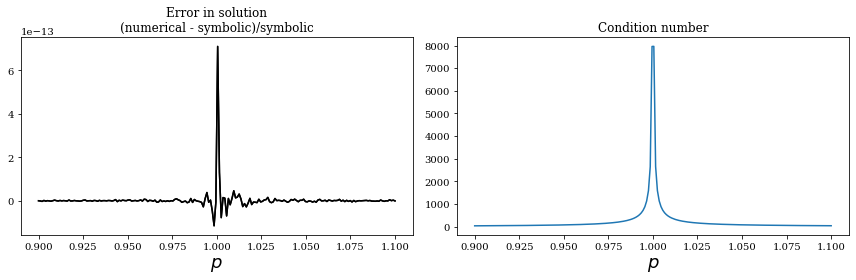

In [47]:
#Graph the difference between the symbolic (exact) and numerical results.
p_vec = np.linspace(0.9, 1.1, 200)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for n in range(2):
    x_sym = np.array([x_sym_sol[n].subs(p, pp).evalf() for pp in p_vec])
    x_num = np.array([x_num_sol(pp)[n] for pp in p_vec])
    axes[0].plot(p_vec, (x_num - x_sym)/x_sym, 'k')
axes[0].set_title("Error in solution\n(numerical - symbolic)/symbolic")
axes[0].set_xlabel(r'$p$', fontsize=18)

axes[1].plot(p_vec, [Acond.subs(p, pp).evalf() for pp in p_vec])
axes[1].set_title("Condition number")
axes[1].set_xlabel(r'$p$', fontsize=18)

fig.tight_layout()
fig.savefig('pdf_files/ch5-linear-systems-condition-number.pdf')

## Rectangular systems

### Underdetermined (fat matrix)

In [48]:
unknown = sympy.symbols("x, y, z")

In [49]:
A  = sympy.Matrix([[1, 2, 3], [4, 5, 6]])
A

⎡1  2  3⎤
⎢       ⎥
⎣4  5  6⎦

In [50]:
x = sympy.Matrix(unknown)

In [51]:
b = sympy.Matrix([7, 8])
b

⎡7⎤
⎢ ⎥
⎣8⎦

In [52]:
AA  = A * x - b
AA

⎡ x + 2⋅y + 3⋅z - 7 ⎤
⎢                   ⎥
⎣4⋅x + 5⋅y + 6⋅z - 8⎦

In [53]:
sympy.solve(A*x - b, unknown)

In [54]:
AUnd = np.array([[1, 2, 3], [4, 5, 6]])
print (AUnd) 
bUnd = np.array([7, 8])
#---- this does not work as it is expected a squared matrix ----
#xUnd = la.solve(AUnd, bUnd)
#print xUnd
#print AUnd * xUnd

# Now I try the solution above, the one with sympy.solve()
xbook = np.array([1-19.0/3.0, -2+20.0/3.0, 1])
# As xbook is a vector, you do not need to transtpose it. Python does it for you!
print (" they are the same ")
print (xbook)
print (xbook.T)
print (" Results are the same and match bUnd ")
print (AUnd.dot(xbook.T))
print (AUnd.dot(xbook))
print (bUnd)

[[1 2 3]
 [4 5 6]]
 they are the same 
[-5.33333333  4.66666667  1.        ]
[-5.33333333  4.66666667  1.        ]
 Results are the same and match bUnd 
[7. 8.]
[7. 8.]
[7 8]


### Overdetermined: least squares (long skin matrix)
### and you cannot use la.solve(A, Y) as A is not a square matrix and so its inverse does not exist

(3, 100)
(100, 3)
(100,)
the solution is  [0.75923173 2.03586084 3.83720879]


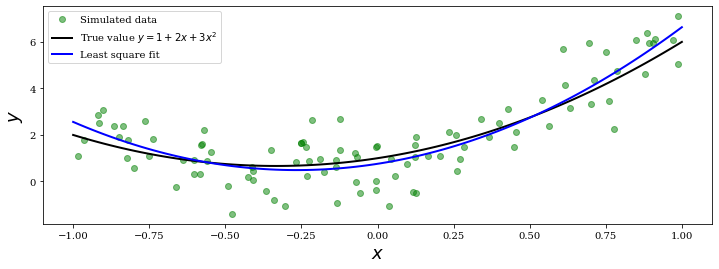

In [55]:
np.random.seed(1234)

# define true model parameters
x       = np.linspace(-1, 1, 100)
a, b, c = 1, 2, 3
y_exact = a + b * x + c * x**2

# simulate noisy data points
m = 100
X = 1 - 2 * np.random.rand(m)
Y = a + b * X + c * X**2 + np.random.randn(m)

# fit the data to the model using linear least square
A = np.vstack([X**0, X**1, X**2])  # see np.vander for alternative
print (np.shape(A))
print (np.shape(A.T))
print (np.shape(Y))

sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit = sol[0] + sol[1] * x + sol[2] * x**2

print ("the solution is ", sol)
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(X, Y, 'go', alpha=0.5, label='Simulated data')
ax.plot(x, y_exact, 'k', lw=2, label='True value $y = 1 + 2x + 3x^2$')
ax.plot(x, y_fit, 'b', lw=2, label='Least square fit')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2);



In [56]:
#My Checks on the various solution methods
print (sol)

Ap       = np.transpose(A)
ATxA     = np.dot(A, Ap)
ATxAInv  = np.linalg.inv(ATxA)

y        = np.vstack([Y])  # see np.vander for alternative
y        = np.transpose(y)

# *******************************
print (np.shape(Y))
print (np.shape(y))
print (np.shape(A))
# *******************************

print (" --------------- Method 1  --------------- ")
ATxY     = np.dot(A, y)
beta     = np.dot(ATxAInv, ATxY)
yyy      = np.dot(Ap, beta)
print (beta)
print (" ---------------------------------------------------- ")

print (" --------------- Method 2  --------------- ")
print (np.linalg.solve(ATxA, ATxY))
print (" ---------------------------------------------------- ")

[0.75923173 2.03586084 3.83720879]
(100,)
(100, 1)
(3, 100)
 --------------- Method 1  --------------- 
[[0.75923173]
 [2.03586084]
 [3.83720879]]
 ---------------------------------------------------- 
 --------------- Method 2  --------------- 
[[0.75923173]
 [2.03586084]
 [3.83720879]]
 ---------------------------------------------------- 


range(0, 2)


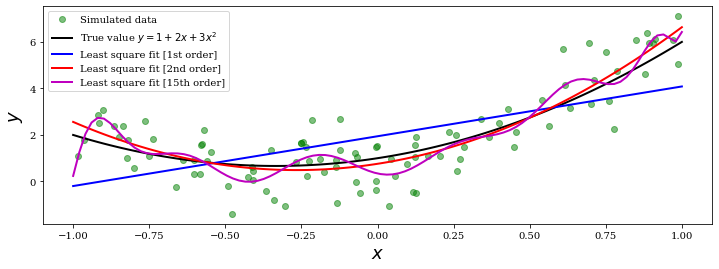

In [57]:
# fit the data to the model using linear least square: 
print (range(2))
# 1st order polynomial
A = np.vstack([X**n for n in range(2)]) # equivalent to A = np.vstack([X**0, X**1])
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit1 = sum([s * x**n for n, s in enumerate(sol)])

# 2nd order polynomial
A = np.vstack([X**n for n in range(3)]) # equivalent to A = np.vstack([X**0, X**1, X**2])
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit2 = sum([s * x**n for n, s in enumerate(sol)])

# 15th order polynomial
A = np.vstack([X**n for n in range(16)])# equivalent to A = np.vstack([X**0, X**1, X**2,....,X*15])
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit15 = sum([s * x**n for n, s in enumerate(sol)])

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(X, Y, 'go',  alpha=0.5, label='Simulated data')
ax.plot(x, y_exact, 'k', lw=2, label='True value $y = 1 + 2x + 3x^2$')
ax.plot(x, y_fit1,  'b', lw=2, label='Least square fit [1st order]')
ax.plot(x, y_fit2,  'r', lw=2, label='Least square fit [2nd order]')
ax.plot(x, y_fit15, 'm', lw=2, label='Least square fit [15th order]')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2);